## Задание 5** с прошлого дз

Вычисление метрик для мониторинга.
суммарная выручка
кол-во покупок
средний чек
среднее кол-во товаров в покупке
Дополнительно добавим возможность фильтровать данные по различным параметрам. Это может быть полезно чтобы посмотреть как меняются продажи в двух группах, или в какой-то отдельной категории товаров.
На вход функции будет подаваться датафрейм с данными о продажах, словарь с фильтрами и период, за который нужно посчитать метрики.
Функция должна вернуть датафрейм, в индексах которого будут все даты из указанного периода отсортированные по возрастанию, а столбцы - метрики ['revenue', 'number_purchases', 'average_check', 'average_number_items']. Формат данных столбцов - float, формат данных индекса - datetime64[ns].
Если в какие-то дни не было продаж, то нужно заполнить пропуск нулём.


In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(
            [[820, '2021-04-29', 1, 213],
             [100, '2021-04-29', 1, 213],
             [600, '2021-04-30', 2, 113],
             [700, '2021-05-01', 3, 893],
             [600, '2021-05-02', 4, 345],
             [700, '2021-05-02', 4, 893],
             [700, '2021-05-06', 9, 543],
             [600, '2021-05-02', 4, 113],
             [700, '2021-05-02', 5, 213],
             [600, '2021-05-04', 6, 543],
             [700, '2021-05-04', 7, 893],
             [600, '2021-05-05', 8, 113],
             [700, '2021-05-05', 10, 543],
             [700, '2021-05-05', 10, 543]],
            columns=['cost', 'date', 'sale_id', 'shop_id']
        )
print(data.dtypes)
data

cost        int64
date       object
sale_id     int64
shop_id     int64
dtype: object


,cost,date,sale_id,shop_id
0,820,2021-04-29,1,213
1,100,2021-04-29,1,213
2,600,2021-04-30,2,113
3,700,2021-05-01,3,893
4,600,2021-05-02,4,345
5,700,2021-05-02,4,893
6,700,2021-05-06,9,543
7,600,2021-05-02,4,113
8,700,2021-05-02,5,213
9,600,2021-05-04,6,543


In [ ]:
def calculate_sales_metrics(df, cost_name, date_name, sale_id_name, period, filters=None):
  df_new = df.sort_values(by=date_name, ascending = True).loc[(df[date_name]>=period['begin']) & (df[date_name]<period['end'])]
  df_new['count_sales'] = 1
  if filters:
    for i in filters.keys():
      if i in df_new.columns:
        df_new = df_new.loc[df_new[i].isin(list(filters[i]))]
  df_gb_date = df_new.groupby(by=date_name)
  df_gb_date_sid = df_new.groupby(by=[date_name,sale_id_name])
  df_gb_date_sid_new = df_gb_date_sid.sum().reset_index()
  df_gb_date_sid_new[sale_id_name] = 1
  df_gb_date_sid_new = df_gb_date_sid_new.groupby(by=date_name).sum()
  df_filtered = pd.DataFrame({'revenue':df_gb_date.sum()[cost_name],
                              'number_purchases':df_gb_date.sum()['count_sales'],
                              'average_check':round(df_gb_date.sum()[cost_name]/df_gb_date.sum()['count_sales'],2),
                              'average_number_items':df_gb_date_sid_new['count_sales']/df_gb_date_sid_new[sale_id_name]},
                             index = df_gb_date.sum().index.astype('datetime64[ns]')).astype('float')
  df_filtered.index.name = None
  return df_filtered
  #  """Вычисляет метрики по продажам.
  #  df - pd.DataFrame, датафрейм с данными. Пример
  #      pd.DataFrame(
  #          [[820, '2021-04-03', 1, 213]],
  #          columns=['cost', 'date', 'sale_id', 'shop_id']
  #      )
  #  cost_name - str, название столбца с стоимостью товара
  #  date_name - str, название столбца с датой покупки
  #  sale_id_name - str, название столбца с идентификатором покупки (в одной покупке может быть несколько товаров)
  #  period - dict, словарь с датами начала и конца периода пилота.
  #      Пример, {'begin': '2020-01-01', 'end': '2020-01-08'}.
  #      Дата начала периода входит в полуинтервал, а дата окончания нет,
  #      то есть '2020-01-01' <= date < '2020-01-08'.
  #  filters - dict, словарь с фильтрами. Ключ - название поля, по которому фильтруем, значение - список значений,
  #      которые нужно оставить. Например, {'user_id': [111, 123, 943]}.
  #      Если None, то фильтровать не нужно.
  #  return - pd.DataFrame, в индексах все даты из указанного периода отсортированные по возрастанию,
  #      столбцы - метрики ['revenue', 'number_purchases', 'average_check', 'average_number_items'].
  #      Формат данных столбцов - float, формат данных индекса - datetime64[ns].
  #  """
   # YOUR_CODE_HERE

filters = {'sale_id': [4, 5, 3, 9, 8, 10], 'shop_id': [543, 213, 113]}
period = {'begin': '2021-04-30', 'end': '2021-05-06'}
calculate_sales_metrics(data,'cost','date','sale_id',period, filters)

,revenue,number_purchases,average_check,average_number_items
2021-05-02,1300.0,2.0,650.00,1.0
2021-05-05,2000.0,3.0,666.67,1.5


# Тема “Визуализация данных в Matplotlib”

## Задание 1

Загрузите модуль pyplot библиотеки matplotlib с псевдонимом plt, а также библиотеку numpy с псевдонимом np.
Примените магическую функцию %matplotlib inline для отображения графиков в Jupyter Notebook и настройки конфигурации ноутбука со значением 'svg' для более четкого отображения графиков.
Создайте список под названием x с числами 1, 2, 3, 4, 5, 6, 7 и список y с числами 3.5, 3.8, 4.2, 4.5, 5, 5.5, 7.
С помощью функции plot постройте график, соединяющий линиями точки с горизонтальными координатами из списка x и вертикальными - из списка y.
Затем в следующей ячейке постройте диаграмму рассеяния (другие названия - диаграмма разброса, scatter plot).


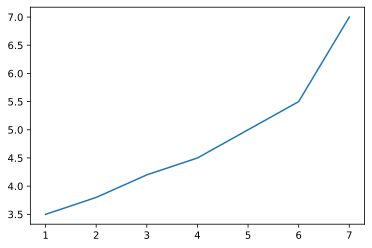

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
x = [1, 2, 3, 4, 5, 6, 7]
y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7.]
plt.plot(x,y)
plt.show()

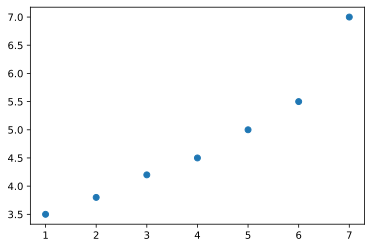

In [3]:
plt.scatter(x,y)
plt.show()

## Задание 2

С помощью функции linspace из библиотеки Numpy создайте массив t из 51 числа от 0 до 10 включительно.
Создайте массив Numpy под названием f, содержащий косинусы элементов массива t.
Постройте линейную диаграмму, используя массив t для координат по горизонтали,а массив f - для координат по вертикали. Линия графика должна быть зеленого цвета.
Выведите название диаграммы - 'График f(t)'. Также добавьте названия для горизонтальной оси - 'Значения t' и для вертикальной - 'Значения f'.
Ограничьте график по оси x значениями 0.5 и 9.5, а по оси y - значениями -2.5 и 2.5.


In [4]:
t = np.linspace(0, 10, 51)
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ])

In [5]:
f = np.cos(t)
f

array([ 1.        ,  0.98006658,  0.92106099,  0.82533561,  0.69670671,
        0.54030231,  0.36235775,  0.16996714, -0.02919952, -0.22720209,
       -0.41614684, -0.58850112, -0.73739372, -0.85688875, -0.94222234,
       -0.9899925 , -0.99829478, -0.96679819, -0.89675842, -0.79096771,
       -0.65364362, -0.49026082, -0.30733287, -0.11215253,  0.08749898,
        0.28366219,  0.46851667,  0.63469288,  0.77556588,  0.88551952,
        0.96017029,  0.9965421 ,  0.99318492,  0.95023259,  0.86939749,
        0.75390225,  0.60835131,  0.43854733,  0.25125984,  0.05395542,
       -0.14550003, -0.33915486, -0.51928865, -0.67872005, -0.81109301,
       -0.91113026, -0.97484362, -0.99969304, -0.98468786, -0.93042627,
       -0.83907153])

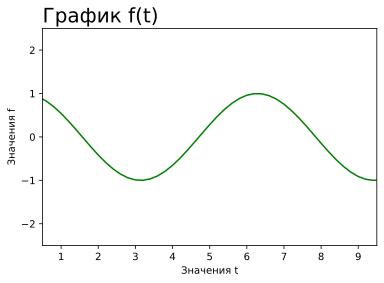

In [13]:
plt.plot(t, f, color = 'green')
plt.title('График f(t)', fontsize = 20, loc = 'left')
plt.xlabel('Значения t')
plt.ylabel('Значения f')
plt.axis([0.5, 9.5, -2.5, 2.5])
plt.show()

## *Задание 3

С помощью функции linspace библиотеки Numpy создайте массив x из 51 числа от -3 до 3 включительно.
Создайте массивы y1, y2, y3, y4 по следующим формулам:
y1 = x**2
y2 = 2 * x + 0.5
y3 = -3 * x - 1.5
y4 = sin(x)
Используя функцию subplots модуля matplotlib.pyplot, создайте объект matplotlib.figure.Figure с названием fig и массив объектов Axes под названием ax,причем так, чтобы у вас было 4 отдельных графика в сетке, состоящей из двух строк и двух столбцов. В каждом графике массив x используется для координат по горизонтали.В левом верхнем графике для координат по вертикали используйте y1,в правом верхнем - y2, в левом нижнем - y3, в правом нижнем - y4.Дайте название графикам: 'График y1', 'График y2' и т.д.
Для графика в левом верхнем углу установите границы по оси x от -5 до 5.
Установите размеры фигуры 8 дюймов по горизонтали и 6 дюймов по вертикали.
Вертикальные и горизонтальные зазоры между графиками должны составлять 0.3.


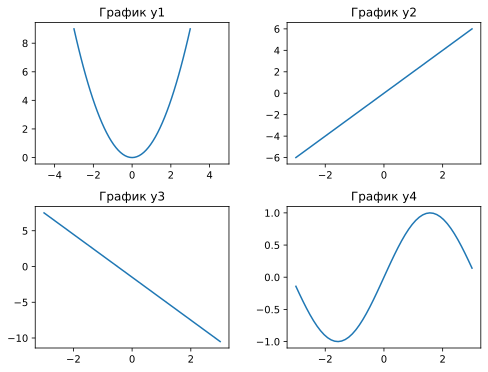

In [24]:
x = np.linspace(-3, 3, 51)
y1 = x**2
y2 = 2*x
y3 = -3*x-1.5
y4 = np.sin(x)
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 6)
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x, y1)
ax1.set(xlim=(-5, 5))
ax1.set_title('График y1')
ax2.plot(x, y2)
ax2.set_title('График y2')
ax3.plot(x, y3)
ax3.set_title('График y3')
ax4.plot(x, y4)
ax4.set_title('График y4')
plt.show()

## *Задание 4

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).
Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
Credit Card Fraud Detection
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортируйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.
Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб.
На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “V1”.


In [71]:
import pandas as pd
plt.style.use('fivethirtyeight')
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [79]:
df.copy()['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

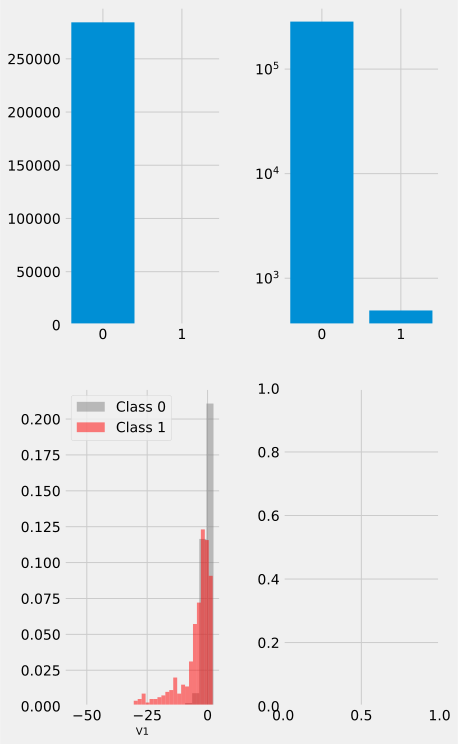

In [144]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(6, 12)
fig.subplots_adjust(wspace = 0.4, hspace=0.2)
ax1, ax2,ax3, ax4 = ax.flatten()
x = df.copy()['Class'].value_counts().index
y = df.copy()['Class'].value_counts()
ax1.bar(x, y)
ax2.bar(x, y)
ax2.set(yscale = 'log')
ax3.hist(df.copy().loc[df.Class == 0]['V1'], density=True, bins=20, alpha=0.5, color='grey')
ax3.hist(df.copy().loc[df.Class == 1]['V1'], density=True, bins=20, alpha=0.5, color='red')
ax3.legend(labels=('Class 0','Class 1'))
ax3.set_xlabel('V1', fontsize=10)
plt.show()

## **Задание на повторение материала

Создать одномерный массив Numpy под названием a из 12 последовательных целых чисел чисел от 12 до 24 невключительно

In [146]:
a = np.linspace(12,24,12,endpoint=False)
a

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

Создать 5 двумерных массивов разной формы из массива a. Не использовать в аргументах метода reshape число -1.

In [152]:
np.reshape(a, (1,12))

array([[12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]])

In [151]:
np.reshape(a, (2,6))

array([[12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.]])

In [153]:
np.reshape(a, (3,4))

array([[12., 13., 14., 15.],
       [16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [154]:
np.reshape(a, (4,3))

array([[12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.]])

In [155]:
np.reshape(a, (6,2))

array([[12., 13.],
       [14., 15.],
       [16., 17.],
       [18., 19.],
       [20., 21.],
       [22., 23.]])

Создать 5 двумерных массивов разной формы из массива a. Использовать в аргументах метода reshape число -1 (в трех примерах - для обозначения числа столбцов, в двух - для строк).

In [166]:
print(np.reshape(a, (1,-1)))
np.reshape(a, (-1, 12))

[[12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23.]]


array([[12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]])

In [162]:
np.reshape(a, (2, -1))

array([[12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.]])

In [163]:
np.reshape(a, (3,-1))

array([[12., 13., 14., 15.],
       [16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [160]:
np.reshape(a, (-1,3))

array([[12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.]])

In [159]:
np.reshape(a, (-1,2))

array([[12., 13.],
       [14., 15.],
       [16., 17.],
       [18., 19.],
       [20., 21.],
       [22., 23.]])

Можно ли массив Numpy, состоящий из одного столбца и 12 строк, назвать одномерным?

In [168]:
b = np.reshape(a, (12,1))
print(b)
b[0]

[[12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]]


array([12.])

Я не могу сразу получить значение по первому измерению, следовательно нельзя такой массив назвать одномерным.

Создать массив из 3 строк и 4 столбцов, состоящий из случайных чисел с плавающей запятой из нормального распределения со средним, равным 0 и среднеквадратичным отклонением, равным 1.0. Получить из этого массива одномерный массив с таким же атрибутом size, как и исходный массив.

In [170]:
c = np.random.randn(3,4)
print(c.size)
c

12


array([[ 0.18361361,  1.67268738,  0.11887783, -0.16223476],
       [ 0.69330039, -1.16667265,  1.37192313, -1.04030639],
       [-0.56238039,  1.65773665,  1.57150566,  0.82447963]])

In [172]:
c.flatten()

array([ 0.18361361,  1.67268738,  0.11887783, -0.16223476,  0.69330039,
       -1.16667265,  1.37192313, -1.04030639, -0.56238039,  1.65773665,
        1.57150566,  0.82447963])

Создать массив a, состоящий из целых чисел, убывающих от 20 до 0 невключительно с интервалом 2.

In [186]:
start = 20
end = 0
step_ = 2
step = int(start/step_)
a = np.linspace(start,end,step,endpoint=False,dtype=np.int32)
a

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2], dtype=int32)

In [187]:
a = np.arange(20, 0, -2)
a

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

Создать массив b, состоящий из 1 строки и 10 столбцов: целых чисел, убывающих от 20 до 1 невключительно с интервалом 2. В чем разница между массивами a и b?

In [190]:
b = np.arange(20, 1, -2)
b

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

In [191]:
np.array_equal(a, b)

True

Никакой разницы не вижу.

Вертикально соединить массивы a и b. a - двумерный массив из нулей, число строк которого больше 1 и на 1 меньше, чем число строк двумерного массива b, состоящего из единиц. Итоговый массив v должен иметь атрибут size, равный 10.

In [195]:
a = np.zeros((2,2))
b = np.ones((3,2))
c = np.concatenate((a,b), axis=0)
c,c.size

(array([[0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]), 10)

Создать одномерный массив а, состоящий из последовательности целых чисел от 0 до 12. Поменять форму этого массива, чтобы получилась матрица A (двумерный массив Numpy), состоящая из 4 строк и 3 столбцов. Получить матрицу At путем транспонирования матрицы A. Получить матрицу B, умножив матрицу A на матрицу At с помощью матричного умножения. Какой размер имеет матрица B? Получится ли вычислить обратную матрицу для матрицы B и почему?

In [200]:
a = np.arange(0,12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [204]:
A = np.reshape(a, (4,3))
A

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [205]:
At = A.T
At

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [210]:
B = A.dot(At)
B, B.shape

(array([[  5,  14,  23,  32],
        [ 14,  50,  86, 122],
        [ 23,  86, 149, 212],
        [ 32, 122, 212, 302]]), (4, 4))

In [219]:
try:
  print(np.linalg.inv(B))
except:
  print(f'Нельзя получить обратную матрицу, так как определитель матрицы = {np.linalg.det(B)}')

Нельзя получить обратную матрицу, так как определитель матрицы = 0.0


Инициализируйте генератор случайных числе с помощью объекта seed, равного 42.

In [230]:
np.random.seed(42)

Создайте одномерный массив c, составленный из последовательности 16-ти случайных равномерно распределенных целых чисел от 0 до 16 невключительно. 

In [232]:
d = np.random.randint(0,16,16)
d

array([ 3,  7,  7,  2,  5,  4,  1,  7, 11, 13,  5,  1, 15, 11,  4,  0])

Поменяйте его форму так, чтобы получилась квадратная матрица C. Получите матрицу D, поэлементно прибавив матрицу B из предыдущего вопроса к матрице C, умноженной на 10. Вычислите определитель, ранг и обратную матрицу D_inv для D.

In [234]:
C = d.reshape(4,4)
C

array([[ 3,  7,  7,  2],
       [ 5,  4,  1,  7],
       [11, 13,  5,  1],
       [15, 11,  4,  0]])

In [235]:
B

array([[  5,  14,  23,  32],
       [ 14,  50,  86, 122],
       [ 23,  86, 149, 212],
       [ 32, 122, 212, 302]])

In [239]:
D = B+C.dot(10)
print(D)
D = B+C*10
D

[[ 35  84  93  52]
 [ 64  90  96 192]
 [133 216 199 222]
 [182 232 252 302]]


array([[ 35,  84,  93,  52],
       [ 64,  90,  96, 192],
       [133, 216, 199, 222],
       [182, 232, 252, 302]])

In [242]:
D_inv = np.linalg.inv(D)
np.linalg.det(D),np.linalg.matrix_rank(D),D_inv

(-23404999.999999978,
 4,
 array([[-0.02745824, -0.02127921, -0.00030506,  0.01848067],
        [-0.00983038, -0.00115445,  0.03006537, -0.01967443],
        [ 0.03091391,  0.00259603, -0.0266755 ,  0.01263576],
        [-0.00169622,  0.01154454, -0.00065371, -0.00325571]]))

Приравняйте к нулю отрицательные числа в матрице D_inv, а положительные - к единице. Убедитесь, что в матрице D_inv остались только нули и единицы. С помощью функции numpy.where, используя матрицу D_inv в качестве маски, а матрицы B и C - в качестве источников данных, получите матрицу E размером 4x4.  Элементы матрицы E, для которых соответствующий элемент матрицы D_inv равен 1, должны быть равны соответствующему элементу матрицы B, а элементы матрицы E, для которых соответствующий элемент матрицы D_inv равен 0, должны быть равны соответствующему элементу матрицы C.

In [248]:
D_inv[D_inv<0]=0
D_inv[D_inv>0]=1
print(D_inv, B, C, sep='\n\n')

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]]

[[  5  14  23  32]
 [ 14  50  86 122]
 [ 23  86 149 212]
 [ 32 122 212 302]]

[[ 3  7  7  2]
 [ 5  4  1  7]
 [11 13  5  1]
 [15 11  4  0]]


In [250]:
E = np.where(D_inv, B, C)
E

array([[  3,   7,   7,  32],
       [  5,   4,  86,   7],
       [ 23,  86,   5, 212],
       [ 15, 122,   4,   0]])